In [19]:
import keras

In [1]:
from keras.datasets import imdb
import numpy as np

def one_hot_encoding(data, dim=10000): # 아래 imdb.load_data의 num_words를 10000으로 설정할 예정이기 때문에 dim도 10000으로 맞춰줍니다.
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 [==============================] - 1s 0us/step


In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 1296769 (4.95 MB)
Trainable params: 1296769 (4.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 33ms/step - loss: 0.4499 - accuracy: 0.7859 - val_loss: 0.3864 - val_accuracy: 0.8348
Epoch 2/30
49/49 [==============================] - 1s 17ms/step - loss: 0.2661 - accuracy: 0.8953 - val_loss: 0.3277 - val_accuracy: 0.8662
Epoch 3/30
49/49 [==============================] - 1s 16ms/step - loss: 0.2079 - accuracy: 0.9199 - val_loss: 0.2840 - val_accuracy: 0.8825
Epoch 4/30
49/49 [==============================] - 1s 16ms/step - loss: 0.1686 - accuracy: 0.9358 - val_loss: 0.3011 - val_accuracy: 0.8815
Epoch 5/30
49/49 [==============================] - 1s 17ms/step - loss: 0.1379 - accuracy: 0.9477 - val_loss: 0.3748 - val_accuracy: 0.8646
Epoch 6/30
49/49 [==============================] - 1s 16ms/step - loss: 0.1061 - accuracy: 0.9616 - val_loss: 0.3534 - val_accuracy: 0.8759
Epoch 7/30
49/49 [==============================] - 1s 17ms/step - loss: 0.0725 - accuracy: 0.9767 - val_loss: 0.8820 - val_accuracy: 0.7797
Epoch 8/30
49

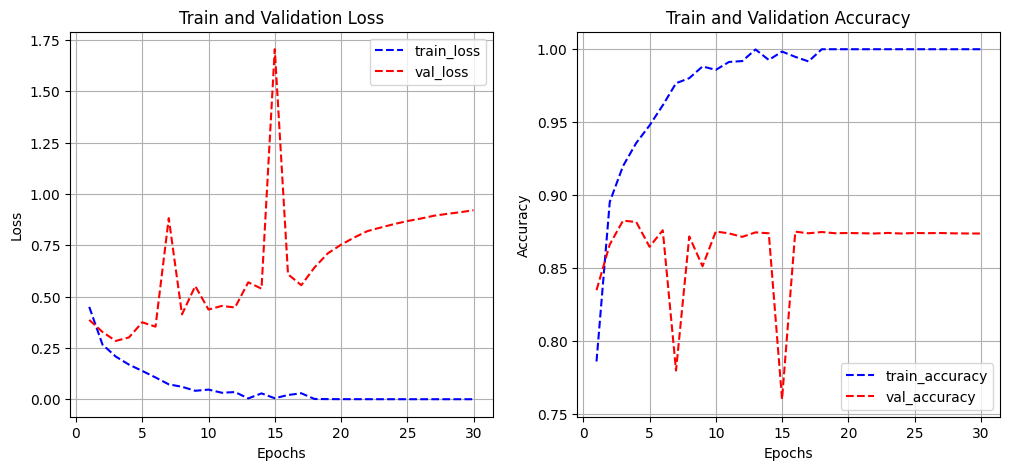

In [5]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

* 훈련이 계속될수록 train 정확도가 계속해서 증가하기때문에 훈련데이터에 대한 과대적합이 되는 모델

#### kears l1 규제
* 케라스에서 l1 규제를 사용하기 위해서는 적용할 레이어에서 kernel_regularizer 를 l1 으로 지정해주면 됨

In [6]:
l1_model =  models.Sequential()
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu', 
                          input_shape=(10000, )))
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l1_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 27ms/step - loss: 3.6819 - accuracy: 0.5454 - val_loss: 1.8841 - val_accuracy: 0.6454
Epoch 2/30
49/49 [==============================] - 0s 10ms/step - loss: 1.8175 - accuracy: 0.6505 - val_loss: 1.7519 - val_accuracy: 0.6942
Epoch 3/30
49/49 [==============================] - 0s 9ms/step - loss: 1.7127 - accuracy: 0.7056 - val_loss: 1.6765 - val_accuracy: 0.7320
Epoch 4/30
49/49 [==============================] - 1s 10ms/step - loss: 1.6316 - accuracy: 0.7314 - val_loss: 1.5857 - val_accuracy: 0.7468
Epoch 5/30
49/49 [==============================] - 0s 9ms/step - loss: 1.5630 - accuracy: 0.7524 - val_loss: 1.5402 - val_accuracy: 0.7594
Epoch 6/30
49/49 [==============================] - 0s 9ms/step - loss: 1.5056 - accuracy: 0.7665 - val_loss: 1.4735 - val_accuracy: 0.7574
Epoch 7/30
49/49 [==============================] - 0s 9ms/step - loss: 1.4566 - accuracy: 0.7764 - val_loss: 1.4450 - val_accuracy: 0.7814
Epoch 8/30
49/49 

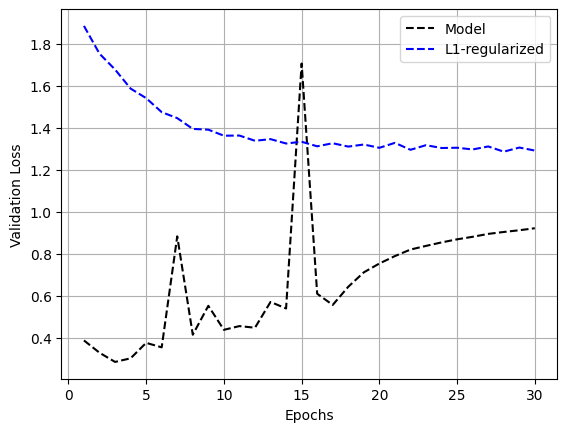

In [8]:
l1_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

* 기존 모델과 비교해보면 l1 모델은 안정적으로 Loss 값을 감소되는것을 확인할 수 있음

In [9]:
l2_model =  models.Sequential()
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu', 
                          input_shape=(10000, )))
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l2_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 24ms/step - loss: 0.7484 - accuracy: 0.7984 - val_loss: 0.5884 - val_accuracy: 0.8701
Epoch 2/30
49/49 [==============================] - 0s 10ms/step - loss: 0.5363 - accuracy: 0.8786 - val_loss: 0.5388 - val_accuracy: 0.8607
Epoch 3/30
49/49 [==============================] - 0s 10ms/step - loss: 0.4883 - accuracy: 0.8874 - val_loss: 0.4883 - val_accuracy: 0.8801
Epoch 4/30
49/49 [==============================] - 0s 10ms/step - loss: 0.4660 - accuracy: 0.8900 - val_loss: 0.4906 - val_accuracy: 0.8669
Epoch 5/30
49/49 [==============================] - 0s 9ms/step - loss: 0.4444 - accuracy: 0.8930 - val_loss: 0.4563 - val_accuracy: 0.8822
Epoch 6/30
49/49 [==============================] - 0s 9ms/step - loss: 0.4374 - accuracy: 0.8898 - val_loss: 0.4552 - val_accuracy: 0.8789
Epoch 7/30
49/49 [==============================] - 0s 10ms/step - loss: 0.4241 - accuracy: 0.8942 - val_loss: 0.4426 - val_accuracy: 0.8820
Epoch 8/30
49/4

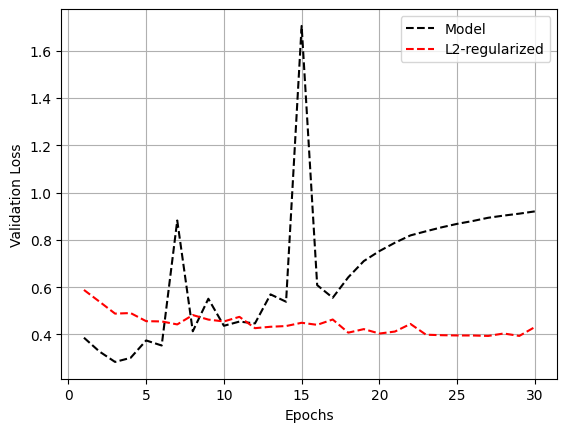

In [11]:
l2_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

* l1 과 l2 규제를 같이 사용하기 위해서 적용할 레이어에서 kernel_regularizer 를 l1_l2로 지정

In [12]:
l1_l2_model =  models.Sequential()
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu', input_shape=(10000, )))
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
l1_l2_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 26ms/step - loss: 3.9151 - accuracy: 0.5666 - val_loss: 2.0468 - val_accuracy: 0.5509
Epoch 2/30
49/49 [==============================] - 0s 8ms/step - loss: 1.9604 - accuracy: 0.6363 - val_loss: 1.8765 - val_accuracy: 0.7042
Epoch 3/30
49/49 [==============================] - 0s 8ms/step - loss: 1.8286 - accuracy: 0.6826 - val_loss: 1.7835 - val_accuracy: 0.6550
Epoch 4/30
49/49 [==============================] - 0s 9ms/step - loss: 1.7258 - accuracy: 0.6870 - val_loss: 1.6749 - val_accuracy: 0.7118
Epoch 5/30
49/49 [==============================] - 0s 9ms/step - loss: 1.6446 - accuracy: 0.6935 - val_loss: 1.6125 - val_accuracy: 0.7188
Epoch 6/30
49/49 [==============================] - 0s 9ms/step - loss: 1.5747 - accuracy: 0.7254 - val_loss: 1.5375 - val_accuracy: 0.7352
Epoch 7/30
49/49 [==============================] - 0s 9ms/step - loss: 1.5102 - accuracy: 0.7534 - val_loss: 1.4852 - val_accuracy: 0.7641
Epoch 8/30
49/49 [=

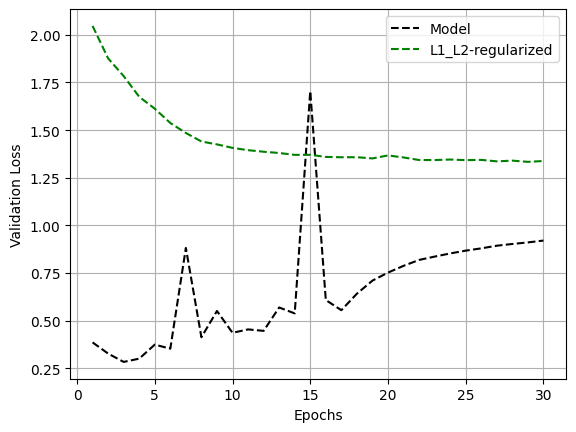

In [14]:
l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [22]:
# L2 규제의 기본 값은 0.01입니다. 여러분이 원하는 크기로 조절해보세요. 혹은 다른 규제를 사용하셔도 됩니다.

your_model =  models.Sequential()
your_model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.1, activation='relu', input_shape=(10000, ))))
your_model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.1, activation='relu')))
your_model.add(layers.Dense(1, activation='sigmoid'))
your_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
your_model.summary()

TypeError: Argument(s) not recognized: {'activation': 'relu', 'input_shape': (10000,)}

In [24]:
# 드롭아웃을 사용하기위해 Dropout레이어를 추가하고 0.2는 20%만 사용하겠다
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                160016    
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
drop_20_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 26ms/step - loss: 0.5326 - accuracy: 0.7601 - val_loss: 0.3907 - val_accuracy: 0.8550
Epoch 2/30
49/49 [==============================] - 0s 9ms/step - loss: 0.3403 - accuracy: 0.8732 - val_loss: 0.3001 - val_accuracy: 0.8822
Epoch 3/30
49/49 [==============================] - 0s 9ms/step - loss: 0.2610 - accuracy: 0.9054 - val_loss: 0.2749 - val_accuracy: 0.8898
Epoch 4/30
49/49 [==============================] - 0s 9ms/step - loss: 0.2168 - accuracy: 0.9230 - val_loss: 0.2807 - val_accuracy: 0.8867
Epoch 5/30
49/49 [==============================] - 0s 9ms/step - loss: 0.1833 - accuracy: 0.9355 - val_loss: 0.3025 - val_accuracy: 0.8802
Epoch 6/30
49/49 [==============================] - 0s 9ms/step - loss: 0.1542 - accuracy: 0.9478 - val_loss: 0.3083 - val_accuracy: 0.8843
Epoch 7/30
49/49 [==============================] - 0s 9ms/step - loss: 0.1355 - accuracy: 0.9552 - val_loss: 0.3559 - val_accuracy: 0.8702
Epoch 8/30
49/49 [=

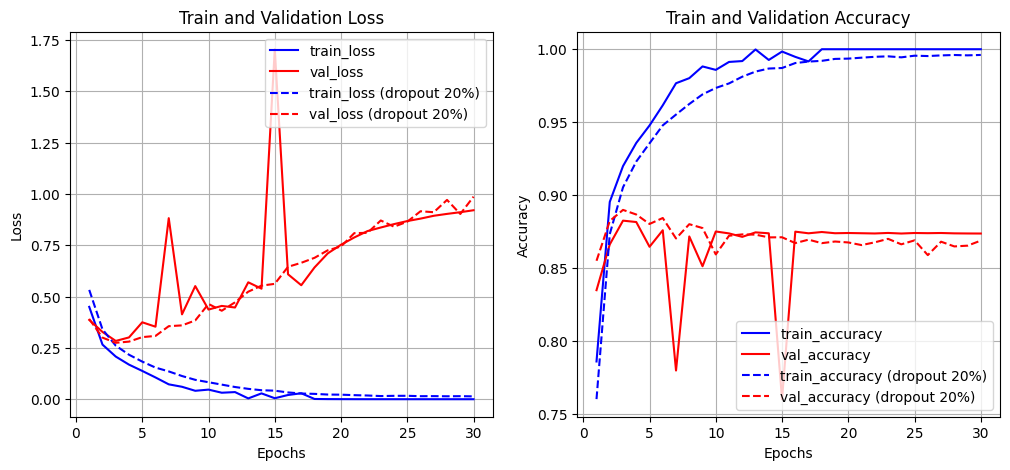

In [26]:
drop_20_dict = drop_20_history.history

drop_20_loss = drop_20_dict['loss']
drop_20_val_loss = drop_20_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_20_accuracy = drop_20_dict['accuracy']
drop_20_val_accuracy = drop_20_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [27]:
# 드롭아웃 50%
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                160016    
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
drop_50_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 24ms/step - loss: 0.5772 - accuracy: 0.6982 - val_loss: 0.4269 - val_accuracy: 0.8669
Epoch 2/30
49/49 [==============================] - 0s 9ms/step - loss: 0.4253 - accuracy: 0.8236 - val_loss: 0.3247 - val_accuracy: 0.8832
Epoch 3/30
49/49 [==============================] - 0s 9ms/step - loss: 0.3499 - accuracy: 0.8659 - val_loss: 0.2837 - val_accuracy: 0.8877
Epoch 4/30
49/49 [==============================] - 0s 9ms/step - loss: 0.2993 - accuracy: 0.8930 - val_loss: 0.2755 - val_accuracy: 0.8886
Epoch 5/30
49/49 [==============================] - 0s 9ms/step - loss: 0.2615 - accuracy: 0.9062 - val_loss: 0.2837 - val_accuracy: 0.8867
Epoch 6/30
49/49 [==============================] - 0s 9ms/step - loss: 0.2331 - accuracy: 0.9179 - val_loss: 0.2876 - val_accuracy: 0.8866
Epoch 7/30
49/49 [==============================] - 0s 9ms/step - loss: 0.2129 - accuracy: 0.9270 - val_loss: 0.2995 - val_accuracy: 0.8866
Epoch 8/30
49/49 [=

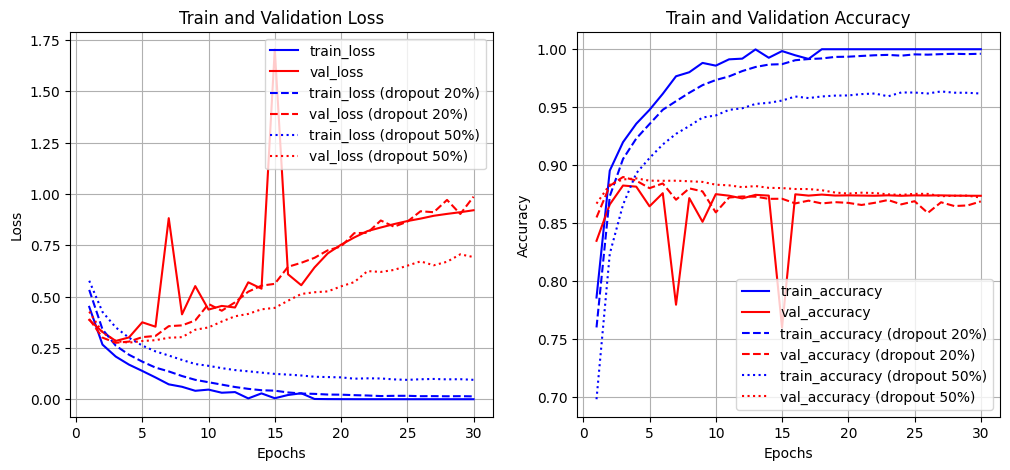

In [29]:
drop_50_dict = drop_50_history.history

drop_50_loss = drop_50_dict['loss']
drop_50_val_loss = drop_50_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.plot(epochs, drop_50_loss, 'b:', label='train_loss (dropout 50%)')
ax1.plot(epochs, drop_50_val_loss, 'r:', label='val_loss (dropout 50%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_50_accuracy = drop_50_dict['accuracy']
drop_50_val_accuracy = drop_50_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.plot(epochs, drop_50_accuracy, 'b:', label='train_accuracy (dropout 50%)')
ax2.plot(epochs, drop_50_val_accuracy, 'r:', label='val_accuracy (dropout 50%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

* 현재 페이지의 모든 목적은 과대적합을 방지하기위한 규제 및 드롭아웃 방법들